In [1]:
import sympy as sym
import numpy as np
import numba as nb

from IPython.display import display, Math

from einsteinpy.symbolic import BaseRelativityTensor, ChristoffelSymbols
from einsteinpy.symbolic.tensor import Tensor

from fpdf import FPDF
import pylatex as pltx

sym.init_printing()

In [11]:
r, M, a, Q, theta, T, gamma = sym.symbols('r, M, a, Q, theta, T, gamma')
rho, Delta = sym.symbols('rho, Delta')
diff_arr = [T, r, theta, gamma]

In [12]:
def calcConnCoeff(alpha, mu, nu, gmn_l, gmn_i_l):
    conn = gmn_i_l[alpha][alpha] * (
        sym.diff(gmn_l[nu][alpha], diff_arr[mu]) + 
        sym.diff(gmn_l[alpha][mu], diff_arr[nu]) -
        sym.diff(gmn_l[mu][nu], diff_arr[alpha])
    )

    conn *= sym.Rational(1,2)

    return conn

def getConnCoeffs(is_matrix, alpha=None, mu=None, nu=None):
    h = r**2 + a**2
    rho_sub = r**2 + a**2 * sym.cos(theta)**2
    Delta_sub = r**2 - 2*M*r + a**2 + Q**2

    g_mu_nu = sym.diag(
        Delta/rho**2,
        -rho**2/Delta,
        -rho**2,
        -h**2 * sym.sin(theta**2) / rho**2
    )
    g_mu_nu_inv = g_mu_nu.inv()

    gmn_l = g_mu_nu.subs([(rho**2, rho_sub), (Delta, Delta_sub)]).tolist()
    gmn_i_l = g_mu_nu_inv.subs([(rho**2, rho_sub), (Delta, Delta_sub)]).tolist()

    if is_matrix:
        conn_coeff_matrix = np.zeros(shape=(4,4,4)).tolist()
        for i in range(4):
            for j in range(4):
                for k in range(4):
                    conn = calcConnCoeff(i, j, k, gmn_l, gmn_i_l)
                    conn = conn.subs([(rho_sub, rho**2), (Delta_sub, Delta)]).simplify()
                    conn_coeff_matrix[i][j][k] = conn

        return conn_coeff_matrix
    
    conn = calcConnCoeff(alpha, mu, nu, gmn_l, gmn_i_l)
    conn = conn.subs([(rho_sub, rho**2), (Delta_sub, Delta)]).simplify()

    return conn

def printConnCoeff(conn_coeff_matrix):
    for i in range(4):
        display(Math(sym.latex(sym.symbols('alpha')) + f"= {str(i)}"))
        for j in range(4):
            text = ""
            for k in range(4):
                text += f'{sym.latex(conn_coeff_matrix[i][j][k])},'
            display(Math(f'{sym.latex(sym.symbols("mu"))} = {j} =>\ {sym.latex(sym.symbols("nu"))} =' + text[:-1]))
                
            print("\n")

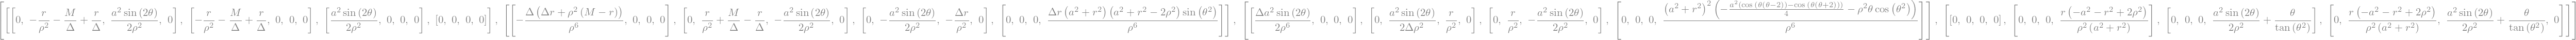

In [10]:
getConnCoeffs(True)